In [5]:
import pandas as pd

# Load the Iris dataset
file_path ="IRIS.csv"  # Update this with your file's path
iris_data = pd.read_csv(file_path)

# Display the first few rows
print(iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 93.33%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



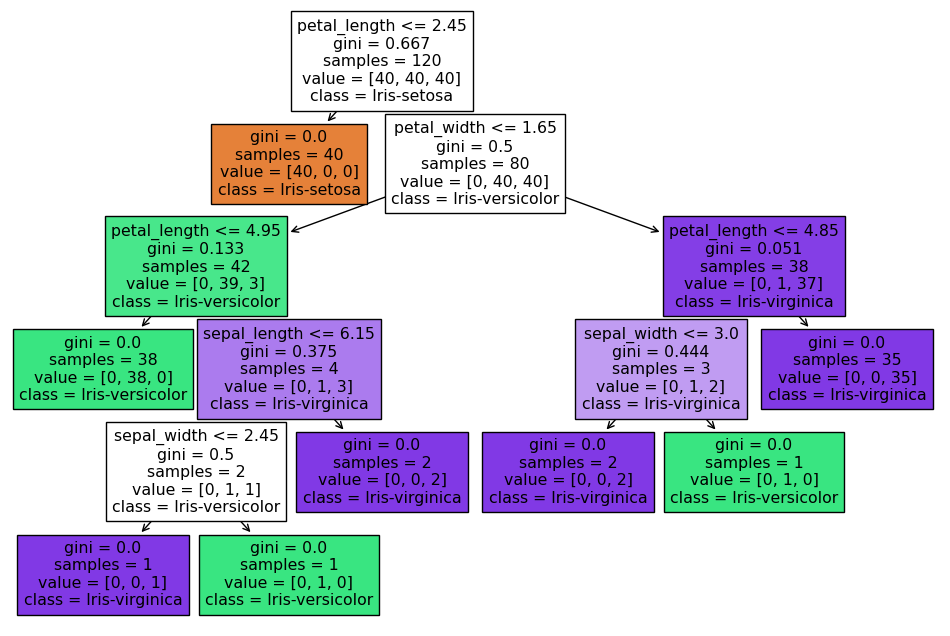

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


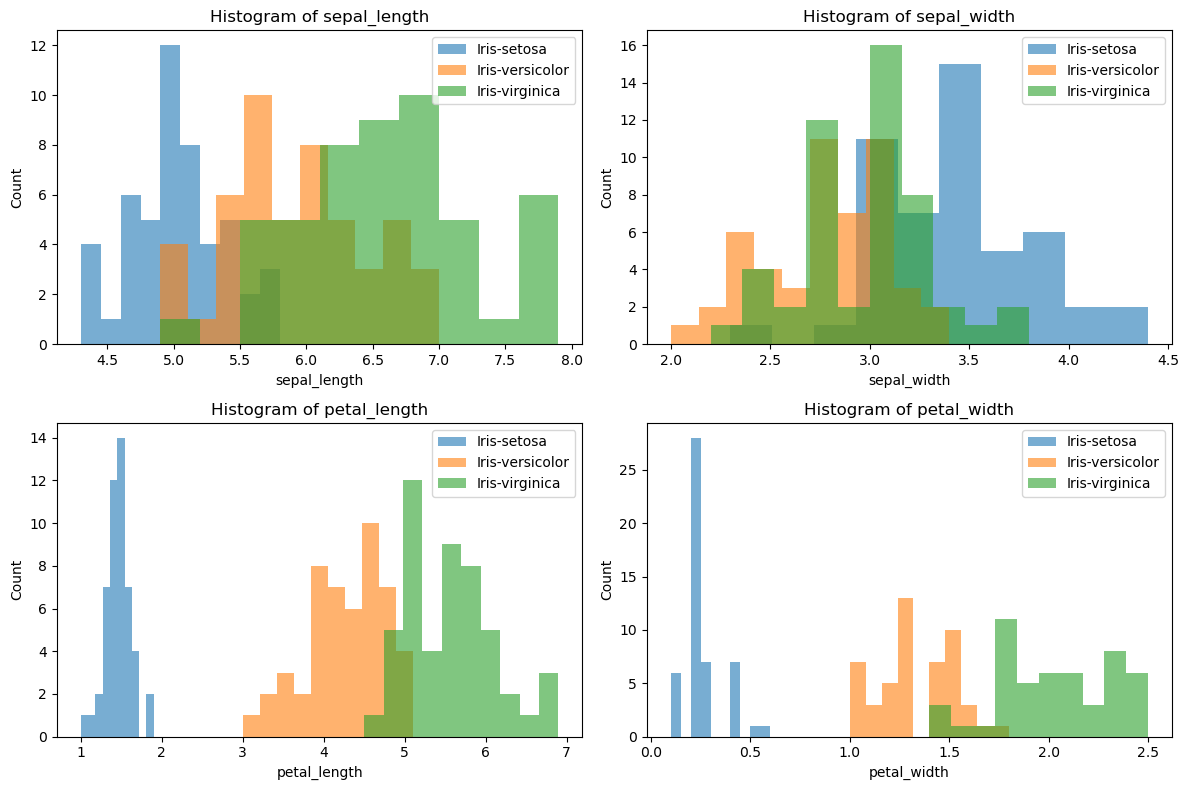

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
features = iris_data.columns[:-1]  # Exclude the 'species' column
species = iris_data['species'].unique()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    for specie in species:
        subset = iris_data[iris_data['species'] == specie]
        plt.hist(subset[feature], alpha=0.6, label=specie, bins=10)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()
